# Machine Learning

Importación de librerias

In [1]:
import pandas as pd # Librería de lectura de datos
import numpy as np # Librería de cálculo numérico


import matplotlib.pyplot as plt # Librería de visualización de datos

from sklearn.model_selection import train_test_split,GridSearchCV # Función para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_text

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve # Funciones para evaluar el rendimiento del modelo

Carga del dataset

In [2]:
df = pd.read_parquet('../clean_data/telco-customer.parquet')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gender                  7043 non-null   category
 1   seniorcitizen           7043 non-null   category
 2   partner                 7043 non-null   category
 3   dependents              7043 non-null   category
 4   tenure                  7043 non-null   int64   
 5   phoneservice            7043 non-null   category
 6   multiplelines           7043 non-null   category
 7   internetservice         7043 non-null   category
 8   onlinesecurity          7043 non-null   category
 9   onlinebackup            7043 non-null   category
 10  deviceprotection        7043 non-null   category
 11  techsupport             7043 non-null   category
 12  streamingtv             7043 non-null   category
 13  streamingmovies         7043 non-null   category
 14  contract                

In [4]:
df_copy = df.copy()

# Codificación de variables categóricas

## Label encoding

In [5]:
# Iniciliar one hot enconder
enconder = OneHotEncoder(sparse_output=False, dtype=int)

# Obtenemos las variables categóricas
cols_categoricas = df_copy.select_dtypes(include='category').columns
#print(cols_categoricas)

#Eliminamos la variable objetivo
cols_categoricas = cols_categoricas.drop('baja')
#print(cols_categoricas)

#Aplicar One Hot Encoding a las columnas categóricas
enconded = enconder.fit_transform(df_copy[cols_categoricas])

# Obtenemos el nombre de las nuevas columnas
column_names = enconder.get_feature_names_out(cols_categoricas)

# Creación del dataframe con valores codificados
df_encoded = pd.DataFrame(enconded,columns=column_names,index=df_copy.index)
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   gender_Female                            7043 non-null   int64
 1   gender_Male                              7043 non-null   int64
 2   seniorcitizen_SeniorCitizen              7043 non-null   int64
 3   seniorcitizen_noSeniorCitizen            7043 non-null   int64
 4   partner_No                               7043 non-null   int64
 5   partner_Yes                              7043 non-null   int64
 6   dependents_No                            7043 non-null   int64
 7   dependents_Yes                           7043 non-null   int64
 8   phoneservice_No                          7043 non-null   int64
 9   phoneservice_Yes                         7043 non-null   int64
 10  multiplelines_No                         7043 non-null   int64
 11  mult

## Label Enconding para variable objetivo

In [6]:
# Aplicar label enconder
label_encoder = LabelEncoder()
target_var = df_copy['baja']
#print(target_var)
target_var = label_encoder.fit_transform(target_var)
print(target_var)


[0 0 1 ... 0 1 0]


## Unir en un dataframe las codificaciones

In [7]:
# Obtenemos las variables numéricas
columns_num_int = df_copy.select_dtypes(include='int64').columns
print(columns_num_int)

columns_num_float = df_copy.select_dtypes(include='float64').columns
print(columns_num_float)

#Obtenemos las variables booleanas
colums_bool = df_copy.select_dtypes(include='bool').columns
print(colums_bool)

Index(['tenure'], dtype='object')
Index(['monthlycharges', 'totalcharges'], dtype='object')
Index(['cliente_larga_duracion', 'phone_and_internet'], dtype='object')


In [8]:
#Unimos todas los datos en un dataframe
column_target = pd.Series(target_var, name='baja', index=df_copy.index)


X_num_int   = df_copy[columns_num_int]
X_num_float = df_copy[columns_num_float]
X_bool      = df_copy[colums_bool]

df_final = pd.concat([column_target, X_num_int, X_num_float, X_bool, df_encoded], axis=1)

df_final.head()



,baja,tenure,monthlycharges,totalcharges,cliente_larga_duracion,phone_and_internet,gender_Female,gender_Male,seniorcitizen_SeniorCitizen,seniorcitizen_noSeniorCitizen,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,29.85,29.85,False,False,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,True,True,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,1,2,53.85,108.15,False,True,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,True,False,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,2,70.70,151.65,False,True,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


## Algoritmos de clasificación

In [9]:
#Separación entre variable objetivo y las demás
#Demás variables
X = df_final.drop(columns='baja')
#X.info()
#Variable objetivo
Y = df_final['baja']

In [10]:
#Divisíon 70%/30%
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

## Feature Selection

Variables tras Varianza: 48
Variables tras ANOVA: 10


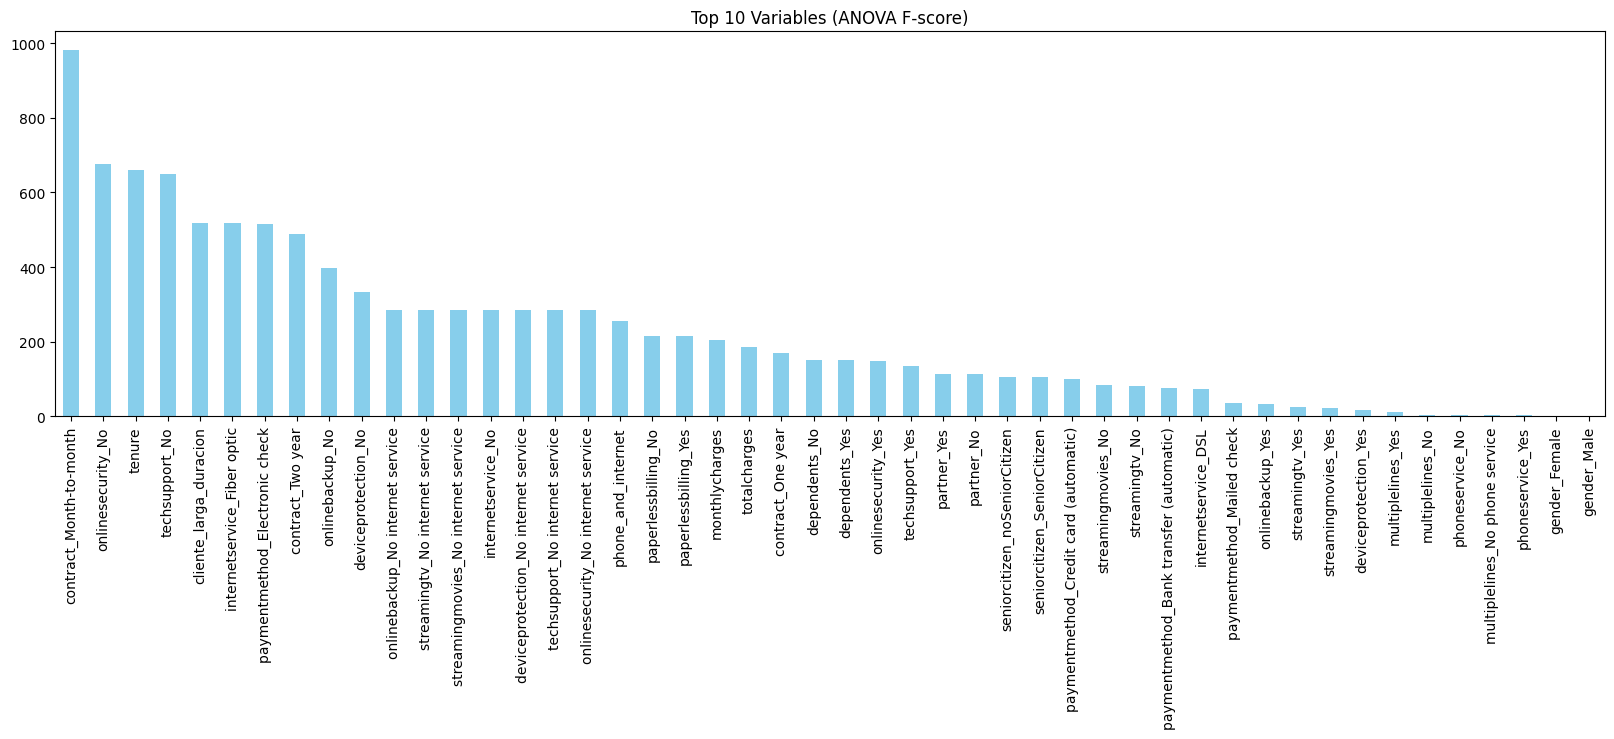

In [11]:
from sklearn.feature_selection import (VarianceThreshold, SelectKBest,
                                      f_classif, RFE, SelectFromModel)

# 1. Filtro por Varianza (Umbral de 0.01)
selector_var = VarianceThreshold(threshold=0.01)
X_train_var = selector_var.fit_transform(X_train)

# 2. Filtro Estadístico (ANOVA) - Seleccionamos las 10 mejores
selector_kbest = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)

print(f"Variables tras Varianza: {X_train_var.shape[1]}")
print(f"Variables tras ANOVA: {X_train_kbest.shape[1]}")

# Visualización de importancia estadística
scores = pd.Series(selector_kbest.scores_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(20, 5))
scores.head(100).plot(kind='bar', color='skyblue')
plt.title("Top 10 Variables (ANOVA F-score)")
plt.show()

## Optimización de hiperparámetros con optuna

### Regresión logística

In [12]:

#Crear modelo
modelo = LogisticRegression()
#Entrenar modelo
modelo.fit(X_train,y_train)

print("Intercepto (β0):", modelo.intercept_[0])
print("Coeficiente (β1):", modelo.coef_[0][0])

Intercepto (β0): -0.14077662042989167
Coeficiente (β1): -0.05737512511200509


c:\Users\camac\OneDrive\Escritorio\Proyecto-8-Problema-de-clasificacion-Grupo-3\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluación y Predicción del modelo

In [13]:
from sklearn.metrics import classification_report

y_pred = modelo.predict(X_test)
y_pred_prob = modelo.predict_proba(X_test)[:, 1]

confusion_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test,y_pred, zero_division = 1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
auc = roc_auc_score(y_test, y_pred_prob)

# Mostrar las métricas
print("Matriz de Confusión:\n", confusion_matrix)
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)

Matriz de Confusión:
 [[1402  150]
 [ 250  311]]
Precisión: 0.6746203904555315
Sensibilidad (Recall): 0.5543672014260249
F1 Score: 0.6086105675146771
AUC-ROC: 0.8448548936913097


## SVM

In [14]:
from sklearn import svm
from sklearn.metrics import confusion_matrix as cm_func
model_svm = svm.SVC(kernel="rbf",
    probability=True,
    class_weight="balanced")
model_svm.fit(X_train,y_train)

y_pred = model_svm.predict(X_test)
y_pred_prob = model_svm.predict_proba(X_test)[:, 1]

cm = cm_func(y_test,y_pred)
precision = precision_score(y_test,y_pred, zero_division = 1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
auc = roc_auc_score(y_test, y_pred_prob)

# Mostrar las métricas
print("Matriz de Confusión:\n", cm)
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)


Matriz de Confusión:
 [[1103  449]
 [ 245  316]]
Precisión: 0.4130718954248366
Sensibilidad (Recall): 0.5632798573975044
F1 Score: 0.4766214177978884
AUC-ROC: 0.7205009463954277


## Arboles de decision

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix as cm_func2

modelo_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
modelo_tree.fit(X_train, y_train)

y_pred = modelo_tree.predict(X_test)
y_pred_prob = modelo_tree.predict_proba(X_test)[:, 1]

cm2 = cm_func2(y_test,y_pred)
precision = precision_score(y_test,y_pred, zero_division = 1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
auc = roc_auc_score(y_test, y_pred_prob)

# Mostrar las métricas
print("Matriz de Confusión:\n", cm2)
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)

Matriz de Confusión:
 [[1261  291]
 [ 279  282]]
Precisión: 0.49214659685863876
Sensibilidad (Recall): 0.5026737967914439
F1 Score: 0.4973544973544973
AUC-ROC: 0.6585545417792235


## K-nearest Neighbour(KNN)

In [16]:
from sklearn.metrics import confusion_matrix as cm_func3


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:, 1]

cm2 = cm_func3(y_test,y_pred)
precision = precision_score(y_test,y_pred, zero_division = 1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
auc = roc_auc_score(y_test, y_pred_prob)

# Mostrar las métricas
print("Matriz de Confusión:\n", cm2)
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)

Matriz de Confusión:
 [[1357  195]
 [ 317  244]]
Precisión: 0.5558086560364465
Sensibilidad (Recall): 0.43493761140819964
F1 Score: 0.488
AUC-ROC: 0.7190227778084055


## Random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)


rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"  
)

# Entrenamos
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Métricas
cm_rf = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
auc = roc_auc_score(y_test, y_pred_prob)

# Mostrar resultados
print("Matriz de Confusión:\n", cm_rf)
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)


Matriz de Confusión:
 [[1387  165]
 [ 297  264]]
Precisión: 0.6153846153846154
Sensibilidad (Recall): 0.47058823529411764
F1 Score: 0.5333333333333333
AUC-ROC: 0.8163975641803111


## XGBoost

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
# Definimos el modelo XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss",
)

# Entrenamos
xgb.fit(X_train, y_train)

# Predicciones
y_pred = xgb.predict(X_test)
y_pred_prob = xgb.predict_proba(X_test)[:, 1]

# Métricas
cm_xgb = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
auc = roc_auc_score(y_test, y_pred_prob)

# Mostrar resultados
print("Matriz de Confusión:\n", cm_xgb)
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)


Matriz de Confusión:
 [[1396  156]
 [ 279  282]]
Precisión: 0.6438356164383562
Sensibilidad (Recall): 0.5026737967914439
F1 Score: 0.5645645645645646
AUC-ROC: 0.837059191061617


In [19]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

def evaluar_modelo(nombre, model, X_train, y_train, X_test, y_test):
    """
    Entrena un modelo, predice y devuelve un diccionario con métricas.
    """
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Probabilidades (si el modelo las soporta)
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_prob)
    elif hasattr(model, "decision_function"):
        # Para modelos tipo SVC sin predict_proba (si no activaste probability=True)
        scores = model.decision_function(X_test)
        auc = roc_auc_score(y_test, scores)
    else:
        auc = None

    return {
        "Modelo": nombre,
        "Precision": precision_score(y_test, y_pred, zero_division=1),
        "Recall": recall_score(y_test, y_pred, zero_division=1),
        "F1-score": f1_score(y_test, y_pred, zero_division=1),
        "AUC-ROC": auc,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# 1) Define aquí tus modelos (los que quieras)
modelos = {
    "Regresión logística": modelo,     # ejemplo: tu objeto ya creado
    "KNN": knn,
    "Árbol de decisión": modelo_tree,
    "SVC": model_svm,
    "Random Forest": rf,
    "XGBoost": xgb
}

# 2) Evalúa todos y guarda resultados
resultados = []
cms = {}

for nombre, modelo in modelos.items():
    res = evaluar_modelo(nombre, modelo, X_train, y_train, X_test, y_test)
    cms[nombre] = res.pop("Confusion Matrix")  # guardamos CM aparte
    resultados.append(res)

# 3) Crea la tabla final ordenada por F1 (desc)
df_resultados = pd.DataFrame(resultados).sort_values("F1-score", ascending=False).reset_index(drop=True)

df_resultados

c:\Users\camac\OneDrive\Escritorio\Proyecto-8-Problema-de-clasificacion-Grupo-3\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Modelo,Precision,Recall,F1-score,AUC-ROC
0,Regresión logística,0.674620,0.554367,0.608611,0.844855
1,XGBoost,0.643836,0.502674,0.564565,0.837059
2,Random Forest,0.615385,0.470588,0.533333,0.816398
3,Árbol de decisión,0.492147,0.502674,0.497354,0.658555
4,KNN,0.555809,0.434938,0.488000,0.719023
5,SVC,0.413072,0.563280,0.476621,0.720500


## Optimizacion con Optuna

In [20]:
import optuna
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# 1) Escalar UNA VEZ (como en tu ejemplo de clase)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # X e Y son todo tu dataset (no train/test aquí)

def objective(trial):
    params = {
        "C": trial.suggest_float("C", 1e-4, 1e2, log=True),
        "penalty": trial.suggest_categorical("penalty", ["l1", "l2"]),
        "solver": "liblinear",  # liblinear soporta l1 y l2 sin líos
        "class_weight": trial.suggest_categorical("class_weight", [None, "balanced"]),
        "max_iter": 2000,
        "random_state": 42
    }

    model = LogisticRegression(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # usa "f1" si es churn/baja; o "recall" si te interesa captar bajas
    scores = cross_val_score(model, X_scaled, Y, cv=cv, scoring="f1", n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best F1:", study.best_value)
print("Best params:", study.best_params)


c:\Users\camac\OneDrive\Escritorio\Proyecto-8-Problema-de-clasificacion-Grupo-3\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2026-02-12 13:59:26,110] A new study created in memory with name: no-name-36a2b27d-1994-4bb1-8a34-12473550208e
[I 2026-02-12 13:59:29,030] Trial 0 finished with value: 0.6089236237541309 and parameters: {'C': 0.0036343659323235782, 'penalty': 'l2', 'class_weight': None}. Best is trial 0 with value: 0.6089236237541309.
[I 2026-02-12 13:59:32,977] Trial 1 finished with value: 0.6267211157555457 and parameters: {'C': 9.71811119265453, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.6267211157555457.
[I 2026-02-12 13:59:34,907] Trial 2 finished with value: 0.6229794894066107 and parameters: {'C': 0.007755545756996895, 'penalty': 'l2', 'class_weight': 'balan

Best F1: 0.6305835423759909
Best params: {'C': 0.0005763671429021256, 'penalty': 'l2', 'class_weight': None}


In [21]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

# Escalado previo (como en clase)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def objective(trial):
    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 3, 25),
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        "metric": trial.suggest_categorical("metric", ["euclidean", "manhattan"])
    }

    model = KNeighborsClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(model, X_scaled, Y, cv=cv, scoring="f1", n_jobs=-1)
    return scores.mean()

study_knn = optuna.create_study(direction="maximize")
study_knn.optimize(objective, n_trials=50)

print("KNN best F1:", study_knn.best_value)
print("KNN best params:", study_knn.best_params)


[I 2026-02-12 13:59:48,572] A new study created in memory with name: no-name-8fe67bec-8ed1-4e23-b8b6-615f755bd31c
[I 2026-02-12 13:59:48,854] Trial 0 finished with value: 0.5300510732909688 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.5300510732909688.
[I 2026-02-12 13:59:49,146] Trial 1 finished with value: 0.5278810310972649 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.5300510732909688.
[I 2026-02-12 13:59:49,633] Trial 2 finished with value: 0.5564887560073872 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 2 with value: 0.5564887560073872.
[I 2026-02-12 13:59:50,040] Trial 3 finished with value: 0.541299148049841 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 2 with value: 0.5564887560073872.
[I 2026-02-12 13:59:50,230] Trial 4 finished with value: 0.54

KNN best F1: 0.5886529788303608
KNN best params: {'n_neighbors': 25, 'weights': 'uniform', 'metric': 'manhattan'}


In [22]:
import optuna
from sklearn.svm import SVC

def objective(trial):
    params = {
        "C": trial.suggest_float("C", 1e-3, 1e2, log=True),
        "kernel": trial.suggest_categorical("kernel", ["rbf", "linear"]),
        "class_weight": trial.suggest_categorical("class_weight", [None, "balanced"]),
        "probability": True,
        "random_state": 42
    }

    model = SVC(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(model, X_scaled, Y, cv=cv, scoring="f1", n_jobs=-1)
    return scores.mean()

study_svc = optuna.create_study(direction="maximize")
study_svc.optimize(objective, n_trials=50)

print("SVC best F1:", study_svc.best_value)
print("SVC best params:", study_svc.best_params)


[I 2026-02-12 14:00:07,313] A new study created in memory with name: no-name-07ba0891-615a-41f3-baed-a77a21eee797
[I 2026-02-12 14:00:12,869] Trial 0 finished with value: 0.5685677144059126 and parameters: {'C': 0.04420968456537406, 'kernel': 'linear', 'class_weight': None}. Best is trial 0 with value: 0.5685677144059126.
[I 2026-02-12 14:00:22,056] Trial 1 finished with value: 0.5459311365414996 and parameters: {'C': 25.7033747925469, 'kernel': 'rbf', 'class_weight': None}. Best is trial 0 with value: 0.5685677144059126.
[I 2026-02-12 14:00:34,900] Trial 2 finished with value: 0.5623365949802338 and parameters: {'C': 3.393087317546244, 'kernel': 'linear', 'class_weight': None}. Best is trial 0 with value: 0.5685677144059126.
[I 2026-02-12 14:00:41,143] Trial 3 finished with value: 0.45621990726078687 and parameters: {'C': 0.025897636188907277, 'kernel': 'rbf', 'class_weight': None}. Best is trial 0 with value: 0.5685677144059126.
[I 2026-02-12 14:00:46,151] Trial 4 finished with value

SVC best F1: 0.6208313432077354
SVC best params: {'C': 0.019225071685811255, 'kernel': 'rbf', 'class_weight': 'balanced'}


In [23]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

def objective(trial):
    params = {
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
        "max_depth": trial.suggest_int("max_depth", 2, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 50),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 30),
        "max_features": trial.suggest_categorical("max_features", [None, "sqrt", "log2"]),
        "class_weight": trial.suggest_categorical("class_weight", [None, "balanced"]),
        "random_state": 42
    }

    model = DecisionTreeClassifier(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(model, X, Y, cv=cv, scoring="f1", n_jobs=-1)
    return scores.mean()

study_dt = optuna.create_study(direction="maximize")
study_dt.optimize(objective, n_trials=50)

print("Decision Tree best F1:", study_dt.best_value)
print("Decision Tree best params:", study_dt.best_params)


[I 2026-02-12 14:07:24,950] A new study created in memory with name: no-name-9946547e-55e2-4eeb-b738-e4804aac14dc
[I 2026-02-12 14:07:25,191] Trial 0 finished with value: 0.5687557560868526 and parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5687557560868526.
[I 2026-02-12 14:07:25,338] Trial 1 finished with value: 0.5399617327018224 and parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 50, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'class_weight': None}. Best is trial 0 with value: 0.5687557560868526.
[I 2026-02-12 14:07:25,487] Trial 2 finished with value: 0.5131587052717173 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 30, 'min_samples_leaf': 19, 'max_features': 'log2', 'class_weight': None}. Best is trial 0 with value: 0.5687557560868526.
[I 2026-02-12 14:07:25,633] Trial 3 finished with val

Decision Tree best F1: 0.6175436922370185
Decision Tree best params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 40, 'min_samples_leaf': 24, 'max_features': None, 'class_weight': 'balanced'}


In [24]:
import optuna
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 30),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "class_weight": "balanced",
        "random_state": 42,
        "n_jobs": -1
    }

    model = RandomForestClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(model, X, Y, cv=cv, scoring="f1", n_jobs=-1)
    return scores.mean()

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective, n_trials=50)

print("RF best F1:", study_rf.best_value)
print("RF best params:", study_rf.best_params)

[I 2026-02-12 14:07:32,757] A new study created in memory with name: no-name-b0dbb858-6ec5-4090-844a-8cd330265372
[I 2026-02-12 14:07:33,295] Trial 0 finished with value: 0.6264292480878723 and parameters: {'n_estimators': 143, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6264292480878723.
[I 2026-02-12 14:07:34,434] Trial 1 finished with value: 0.6326595834675072 and parameters: {'n_estimators': 354, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 17, 'max_features': 'log2'}. Best is trial 1 with value: 0.6326595834675072.
[I 2026-02-12 14:07:35,528] Trial 2 finished with value: 0.6238545220743308 and parameters: {'n_estimators': 389, 'max_depth': 5, 'min_samples_split': 29, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 1 with value: 0.6326595834675072.
[I 2026-02-12 14:07:36,643] Trial 3 finished with value: 0.6261378764272651 and parameters: {'n_estimators': 384, 'max_depth': 6, 

RF best F1: 0.6358513653219352
RF best params: {'n_estimators': 364, 'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 13, 'max_features': 'log2'}


In [25]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 5.0),
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBClassifier(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(model, X, Y, cv=cv, scoring="f1", n_jobs=-1)
    return scores.mean()

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective, n_trials=50)

print("XGBoost best F1:", study_xgb.best_value)
print("XGBoost best params:", study_xgb.best_params)


[I 2026-02-12 14:08:31,054] A new study created in memory with name: no-name-a1ab342b-263f-4d53-b3d7-d66d10136522
[I 2026-02-12 14:08:32,160] Trial 0 finished with value: 0.6149873928516174 and parameters: {'n_estimators': 378, 'max_depth': 8, 'learning_rate': 0.057590610023127486, 'subsample': 0.8335503740392944, 'colsample_bytree': 0.6889112473678142, 'gamma': 0.9403915314570516, 'reg_alpha': 3.889377043829671, 'reg_lambda': 1.4123771782813592, 'scale_pos_weight': 3.86986006437728}. Best is trial 0 with value: 0.6149873928516174.
[I 2026-02-12 14:08:32,950] Trial 1 finished with value: 0.6029949219705998 and parameters: {'n_estimators': 379, 'max_depth': 8, 'learning_rate': 0.140068216897963, 'subsample': 0.9893570142904848, 'colsample_bytree': 0.9774449156193966, 'gamma': 3.072159023386507, 'reg_alpha': 4.716058912103566, 'reg_lambda': 1.5842131501043473, 'scale_pos_weight': 1.1926984809216385}. Best is trial 0 with value: 0.6149873928516174.
[I 2026-02-12 14:08:34,063] Trial 2 fini

XGBoost best F1: 0.6347727774303605
XGBoost best params: {'n_estimators': 178, 'max_depth': 3, 'learning_rate': 0.015044370345505775, 'subsample': 0.9263538887538572, 'colsample_bytree': 0.92651615013034, 'gamma': 3.906601574715082, 'reg_alpha': 0.9800986051246078, 'reg_lambda': 3.8962924022507006, 'scale_pos_weight': 2.1332309103121974}


## Reentreno

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


best_params = study_xgb.best_params


xgb_final = XGBClassifier(**best_params)
xgb_final.fit(X_train, y_train)


y_train_pred = xgb_final.predict(X_train)
y_test_pred = xgb_final.predict(X_test)


f1_train = f1_score(y_train, y_train_pred, zero_division=1)
f1_test = f1_score(y_test, y_test_pred, zero_division=1)

overfitting_f1 = abs(f1_train - f1_test)

print("F1 train:", round(f1_train, 4))
print("F1 test :", round(f1_test, 4))
print("Overfitting (F1):", round(overfitting_f1, 4))
print("Overfitting (%):", round(overfitting_f1 * 100, 2), "%")


F1 train: 0.6434
F1 test : 0.6334
Overfitting (F1): 0.01
Overfitting (%): 1.0 %


## Exportación del modelo

In [27]:
import joblib

joblib.dump(xgb_final, "../models/xgboost_model.pkl")


['../models/xgboost_model.pkl']